In [1]:
%pip install transformers
%pip install sacremoses
%pip install seqeval

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

c:\projects\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
DATA_IN_PATH = 'C:\\pytest\\data\\KOR\\NER\\'
DATA_OUT_PATH = 'C:\\pytest\\data\\KOR\\NER\\data_out\\'

In [5]:
DATA_TRAIN_PATH = os.path.join(DATA_IN_PATH, "train.tsv")
DATA_TEST_PATH = os.path.join(DATA_IN_PATH, "test.tsv")
DATA_LABEL_PATH = os.path.join(DATA_IN_PATH, "label.txt")


In [6]:
def read_file(input_path, encoding='utf-8'):
    with open(input_path, "r", encoding=encoding) as f:
        sentences = []
        labels = []
        for line in f:
            split_line = line.strip().split("\t")
            sentences.append(split_line[0])
            labels.append(split_line[1])
        return sentences, labels


In [7]:
train_sentences, train_labels = read_file(DATA_TRAIN_PATH)
test_sentences, test_labels = read_file(DATA_TEST_PATH)
ner_sentences = train_sentences + test_sentences
ner_labels = train_labels + test_labels
ner_dict = {"sentence": ner_sentences, "label": ner_labels}
ner_df = pd.DataFrame(ner_dict)


In [14]:
print('전체 ner_data 개수: {}'.format(len(ner_df)))
ner_df.head()


전체 ner_data 개수: 90000


,sentence,label
0,"금석객잔 여러분, 감사드립니다 .",ORG-B O O O
1,이기범 한두 쪽을 먹고 10분 후쯤 화제인을 먹는 것이 좋다고 한다 .,PER-B O O O TIM-B TIM-I CVL-B O O O O O
2,7-8위 결정전에서 김중배 무스파타(샌안토니오)가 참은 법국을 누르고 유럽축구선수권...,EVT-B EVT-I PER-B PER-I O LOC-B O EVT-B CVL-B O O
3,스코틀랜드의 한 마을에서 보통하게 살고 있다는 이 기혼 남성의 시조가 유튜브 등에서...,LOC-B NUM-B NUM-I O O O O O O O O O O O O O CV...
4,보니까 저 옆에 사조가 있어요 .,O O O O O O


In [30]:
train_set = pd.Series(ner_df["sentence"].tolist())
print('유일한 총 문장수:{}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 문장 종류:{}'.format(np.sum(train_set.value_counts() > 1)))


유일한 총 문장수:88703
반복해서 나타나는 문장 종류:288


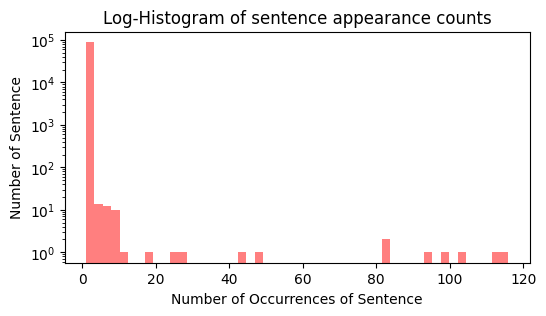

In [36]:
plt.figure(figsize=(6, 3))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r')
plt.yscale('log')
plt.title("Log-Histogram of sentence appearance counts")
plt.xlabel("Number of Occurrences of Sentence")
plt.ylabel("Number of Sentence")
plt.show()


In [13]:
print("중복 최대 개수:{}".format(np.max(train_set.value_counts())))
print("중복 최소 개수:{}".format(np.min(train_set.value_counts())))
print("중복 평균 개수:{:.2f}".format(np.mean(train_set.value_counts())))
print("중복 표준편차:{:.2f}".format(np.std(train_set.value_counts())))
print("중복 개수 중간값:{}".format(np.median(train_set.value_counts())))
print("*****사분위수*****")
print("중복 개수 1사분위수:{}".format(np.percentile(train_set.value_counts(), 25)))
print("중복 개수 3사분위수:{}".format(np.percentile(train_set.value_counts(), 75)))


중복 최대 개수:116
중복 최소 개수:1
중복 평균 개수:1.01
중복 표준편차:0.92
중복 개수 중간값:1.0
*****사분위수*****
중복 개수 1사분위수:1.0
중복 개수 3사분위수:1.0


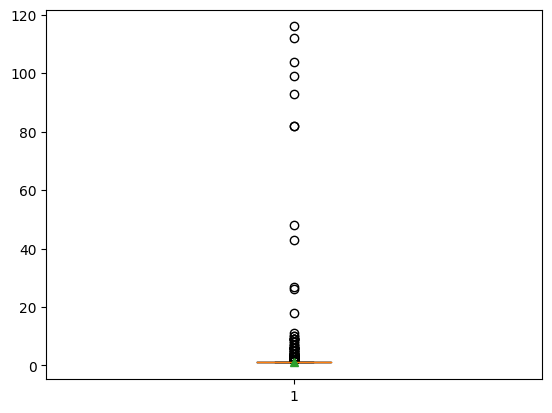

In [31]:
plt.boxplot(train_set.value_counts(), showmeans=True)
plt.show()


In [33]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir="bert_ckpt", do_lower_case=False)


Downloading: 100%|██████████| 996k/996k [00:01<00:00, 767kB/s]  
c:\projects\venv\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\projects\bert_ckpt. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Downloading: 100%|██████████| 29.0/29.0 [00:00<00:00, 14.6kB/s]
Downloading: 100%|██████████| 625/625 [00:00

In [34]:
import pickle
if os.path.exists(DATA_OUT_PATH):
    print("{} -- Folder already exists\n".format(DATA_OUT_PATH))
else:
    os.makedirs(DATA_OUT_PATH, exist_ok=True)
    print("{} -- Folder create complete\n".format(DATA_OUT_PATH))
with open(DATA_OUT_PATH+"bert_tokenizer.pickle", 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)


C:\pytest\data\KOR\NER\data_out\ -- Folder create complete



In [37]:
train_bert_token_counts = train_set.apply(lambda x: len(tokenizer.tokenize(x)))


In [38]:
print(train_bert_token_counts)


0        13
1        23
2        44
3        78
4        12
         ..
89995    12
89996    41
89997    13
89998    38
89999    30
Length: 90000, dtype: int64


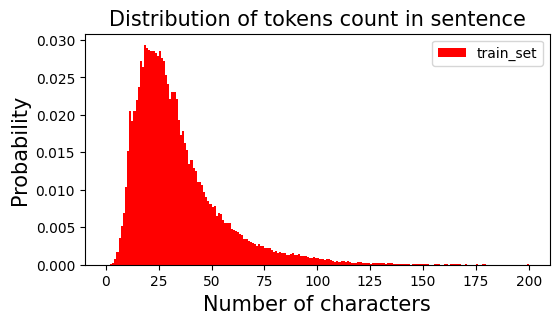

In [41]:
plt.figure(figsize=(6, 3))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label="train_set")
plt.title("Distribution of tokens count in sentence", fontsize=15)
plt.legend()
plt.xlabel("Number of characters", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.show()


In [42]:
print("문장 토큰 개수 평균값:{:.2f}".format(np.mean(train_bert_token_counts)))
print("문장 토큰 개수 표준편차:{:.2f}".format(np.std(train_bert_token_counts)))
print("문장 토큰 개수 중간값:{}".format(np.median(train_bert_token_counts)))
print("문장 토큰 개수 제1사분위:{:.2f}".format(np.percentile(train_bert_token_counts, 25)))
print("문장 토큰 개수 제3사분위:{:.2f}".format(np.percentile(train_bert_token_counts, 75)))
print("*****")  
print("문장 토큰 개수 최댓값:{}".format(np.max(train_bert_token_counts)))
print("문장 토큰 개수 최솟값:{}".format(np.min(train_bert_token_counts)))
print("문장 토큰 개수 99% 구간 최댓값:{:.2f}".format(np.percentile(train_bert_token_counts, 99)))


문장 토큰 개수 평균값:33.62
문장 토큰 개수 표준편차:22.76
문장 토큰 개수 중간값:28.0
문장 토큰 개수 제1사분위:19.00
문장 토큰 개수 제3사분위:41.00
*****
문장 토큰 개수 최댓값:850
문장 토큰 개수 최솟값:1
문장 토큰 개수 99% 구간 최댓값:111.00


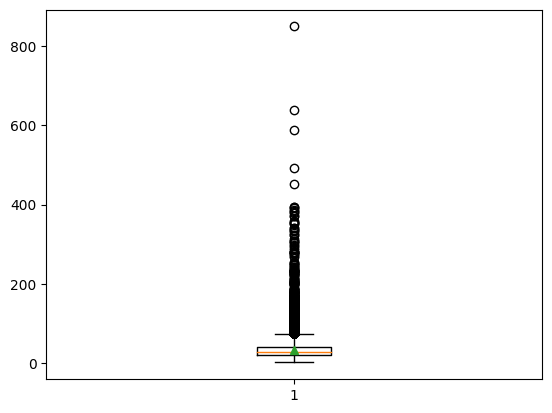

In [43]:
plt.boxplot(train_bert_token_counts, showmeans=True)
plt.show()


In [47]:
import tensorflow as tf
BATCH_SIZE = 32
NUM_EPOCHS = 3
MAX_LEN = 111


In [46]:
train_sentences, train_labels = read_file(DATA_TRAIN_PATH)
train_ner_dict = {"sentence": train_sentences, "label": train_labels}
train_ner_df = pd.DataFrame(train_ner_dict)
test_sentences, test_labels = read_file(DATA_TEST_PATH)
test_ner_dict = {"sentence": test_sentences, "label": test_labels}
test_ner_df = pd.DataFrame(test_ner_dict)
print("개체명 인식 학습 데이터 개수:{}".format(len(train_ner_df)))
print("개체명 인식 테스트 데이터 개수:{}".format(len(test_ner_df)))


개체명 인식 학습 데이터 개수:81000
개체명 인식 테스트 데이터 개수:9000


In [48]:
def get_labels(label_path):
    return [label.strip() for label in open(os.path.join(label_path), 'r', encoding='utf-8')]

ner_labels = get_labels(DATA_LABEL_PATH)
print("NER레이블개수:{}".format(len(ner_labels)))
print("ner_labels:", ner_labels)


NER레이블개수:30
ner_labels: ['UNK', 'O', 'PER-B', 'PER-I', 'FLD-B', 'FLD-I', 'AFW-B', 'AFW-I', 'ORG-B', 'ORG-I', 'LOC-B', 'LOC-I', 'CVL-B', 'CVL-I', 'DAT-B', 'DAT-I', 'TIM-B', 'TIM-I', 'NUM-B', 'NUM-I', 'EVT-B', 'EVT-I', 'ANM-B', 'ANM-I', 'PLT-B', 'PLT-I', 'MAT-B', 'MAT-I', 'TRM-B', 'TRM-I']


In [49]:
ner_begin_label = [ner_labels.index(begin_label) for begin_label in ner_labels if "B" in begin_label]
print("ner_begin_label:", ner_begin_label)

ner_begin_label_string = [ner_labels[label_index] for label_index in ner_begin_label]
print("ner_labels:", ner_labels)
print("ner_begin_label_string:", ner_begin_label_string)


ner_begin_label: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
ner_labels: ['UNK', 'O', 'PER-B', 'PER-I', 'FLD-B', 'FLD-I', 'AFW-B', 'AFW-I', 'ORG-B', 'ORG-I', 'LOC-B', 'LOC-I', 'CVL-B', 'CVL-I', 'DAT-B', 'DAT-I', 'TIM-B', 'TIM-I', 'NUM-B', 'NUM-I', 'EVT-B', 'EVT-I', 'ANM-B', 'ANM-I', 'PLT-B', 'PLT-I', 'MAT-B', 'MAT-I', 'TRM-B', 'TRM-I']
ner_begin_label_string: ['PER-B', 'FLD-B', 'AFW-B', 'ORG-B', 'LOC-B', 'CVL-B', 'DAT-B', 'TIM-B', 'NUM-B', 'EVT-B', 'ANM-B', 'PLT-B', 'MAT-B', 'TRM-B']


In [50]:
# 토큰값 설정
pad_token_id = tokenizer.pad_token_id   # 문장의 길이에 못 미치는 것을 패딩 (0)
pad_token_label_id = 0                  # 라벨링된 값 외에는 0으로 태깅하여 영향을 미치지 못하게 함
cls_token_label_id = 0                  # [CLS] 를 0으로 태깅하여 학습에 영향을 미치지 못하게 함
sep_token_label_id = 0                  # [SEP] 를 0으로 태깅하여 학습에 영향을 미치지 못하게 함

In [51]:
# 사용자 정의 BERT 토크나이저 함수
def bert_tokenizer(sent, MAX_LEN):  
  encoded_dict = tokenizer.encode_plus(
      text = sent,
      add_special_tokens = True,     # [CLS]와 [SEP] 추가
      max_length = MAX_LEN,          # 문장의 최대 길이 조정
      padding = 'max_length',        # padding 적용에 사용할 문장의 최대 길이
      #pad_to_max_length = True,     # MAX_LEN에 못 미치는 길이의 문장은 패딩 적용
      return_attention_mask = True,  # 어떤 단어를 어텐션 시킬지 정보를 가져옴
      truncation = True              # 두 문장이 입력된 경우 긴쪽 문장을 더 많이 잘라서 두 문장의 길이를 갖게 만듦(longest_first)
  )

  input_id = encoded_dict['input_ids']             # 인덱스로 변환된 토큰 저장
  attention_mask = encoded_dict['attention_mask']  # 어텐션 마스크 반영 결과 저장
  token_type_id = encoded_dict['token_type_ids']   # 문장이 1개일 경우 0, 2개일 경우 0과 1로 구분한 결과 저장

  return input_id, attention_mask, token_type_id

In [52]:
# 버트 토크나이저에 맞게 라벨 변경
def convert_label(words, labels_idx, ner_begin_label, max_seq_len):            
    tokens = []
    label_ids = []

    for word, slot_label in zip(words, labels_idx):
        word_tokens = tokenizer.tokenize(word)
        tokens.extend(word_tokens)

        # 슬롯 레이블 값이 Begin이면 I로 추가
        if int(slot_label) in ner_begin_label:
          #print("slot_label with B:", slot_label, ner_labels[slot_label])
          label_ids.extend([int(slot_label)] + [int(slot_label) + 1] * (len(word_tokens) - 1))
        else:
          #print("slot_label without B:", slot_label, ner_labels[slot_label])
          label_ids.extend([int(slot_label)] * len(word_tokens))
  
    # [CLS] and [SEP] 설정
    special_tokens_count = 2
    if len(label_ids) > max_seq_len - special_tokens_count:
        label_ids = label_ids[: (max_seq_len - special_tokens_count)]

    # [SEP] 토큰 추가
    label_ids += [sep_token_label_id]

    # [CLS] 토큰 추가
    label_ids = [cls_token_label_id] + label_ids
    
    padding_length = max_seq_len - len(label_ids)
    label_ids = label_ids + ([pad_token_label_id] * padding_length)
    #print("pad_token_label_id:", pad_token_label_id)
    
    return label_ids

In [53]:
#ner_begin_label = [ner_labels.index(begin_label) for begin_label in ner_labels if "B" in begin_label]

def create_inputs_targets(df):
    input_ids = []
    attention_masks = []
    token_type_ids = []
    label_list = []

    for i, data in enumerate(df[['sentence', 'label']].values):
        sentence, labels = data
        words = sentence.split()
        labels = labels.split()
        labels_idx = []
        
        for label in labels:
            labels_idx.append(ner_labels.index(label) if label in ner_labels else ner_labels.index("UNK"))            
        
        input_id, attention_mask, token_type_id = bert_tokenizer(sentence, MAX_LEN)

        convert_label_id = convert_label(words, labels_idx, ner_begin_label, MAX_LEN)  
                
        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        label_list.append(convert_label_id)   

    input_ids = np.array(input_ids, dtype=int)
    attention_masks = np.array(attention_masks, dtype=int)
    token_type_ids = np.array(token_type_ids, dtype=int)
    label_list = np.asarray(label_list, dtype=int) #레이블 토크나이징 리스트
    inputs = (input_ids, attention_masks, token_type_ids)
    
    return inputs, label_list

train_inputs, train_labels = create_inputs_targets(train_ner_df)
test_inputs, test_labels = create_inputs_targets(test_ner_df)

In [54]:
train_labels

array([[ 0,  8,  9, ...,  0,  0,  0],
       [ 0,  2,  3, ...,  0,  0,  0],
       [ 0, 20, 21, ...,  0,  0,  0],
       ...,
       [ 0,  8,  9, ...,  0,  0,  0],
       [ 0,  8,  9, ...,  0,  0,  0],
       [ 0, 20, 21, ...,  0,  0,  0]])

In [58]:
# 추가 설정 및 버트 임포트
BERT_CKPT = 'C:\\pytest\\data\\KOR\\NER\\bert_ckpt\\'   # 이 경로의 내용은 주기적으로 삭제한다

from keras.callbacks import EarlyStopping, ModelCheckpoint
from transformers import TFBertModel

In [59]:
class TFBertNERClassifier(tf.keras.Model):
    def __init__(self, model_name, dir_path, num_class):
        super(TFBertNERClassifier, self).__init__()

        self.bert = TFBertModel.from_pretrained(model_name, cache_dir=dir_path)
        self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(num_class, name="ner_classifier", 
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range))

    def call(self, inputs, attention_mask=None, token_type_ids=None, training=False):
        #outputs 값: # sequence_output, pooler_output, (hidden_states), (attentions)
        outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=token_type_ids)
        sequence_output = outputs[0]                
        sequence_output = self.dropout(sequence_output, training=training)
        logits = self.classifier(sequence_output)        

        return logits

In [61]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [62]:
# BERT 객체 생성
ner_model = TFBertNERClassifier(model_name='bert-base-multilingual-cased',
                                  dir_path=os.path.join(BERT_CKPT, "model"),
                                  num_class=len(ner_labels))

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.